In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")


df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print(f"Dataset de entrenamiento: {df_train.shape}")
print(f"Dataset de prueba: {df_test.shape}")
df_train.head()

Dataset de entrenamiento: (188533, 13)
Dataset de prueba: (125690, 12)


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [3]:

print()
df_train.info()

print()
df_train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB



,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


Valores nulos por columna:
 fuel_type       5083
accident        2452
clean_title    21419
dtype: int64


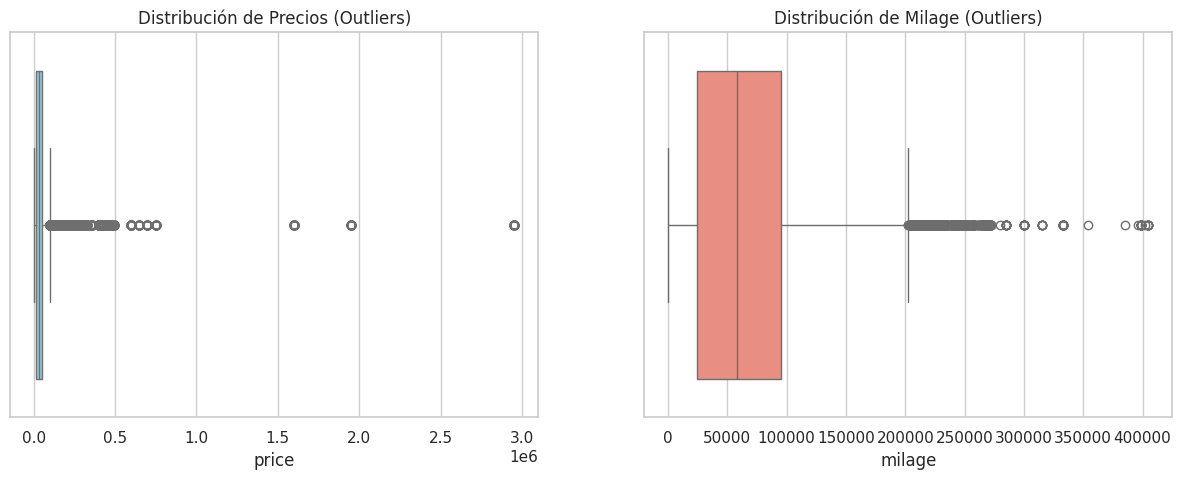

In [4]:

nulls = df_train.isnull().sum()
print("Valores nulos por columna:\n", nulls[nulls > 0])


fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df_train['price'], ax=ax[0], color='skyblue')
ax[0].set_title('Distribución de Precios (Outliers)')

sns.boxplot(x=df_train['milage'], ax=ax[1], color='salmon')
ax[1].set_title('Distribución de Milage (Outliers)')

plt.show()

In [5]:
def clean_data(df):
    df_c = df.copy()

    # 1. Eliminar ID (no ayuda a predecir)
    if 'id' in df_c.columns:
        df_c.drop(columns=['id'], inplace=True)

    # 2. Imputar nulos
    # Para variables categóricas, usaremos 'Unknown' o la moda
    df_c['fuel_type'] = df_c['fuel_type'].fillna('Unknown')
    df_c['accident'] = df_c['accident'].fillna('None reported')

    # 'clean_title' tiene muchos nulos, si es casi todo 'Yes', podríamos eliminar la columna o marcar nulos como 'No'
    df_c['clean_title'] = df_c['clean_title'].fillna('No')

    return df_c

df_train_clean = clean_data(df_train)
df_test_clean = clean_data(df_test)

print("Nulos después de la limpieza:", df_train_clean.isnull().sum().sum())

Nulos después de la limpieza: 0


In [6]:
cols_to_encode = ['fuel_type', 'accident', 'clean_title']

df_final = pd.get_dummies(df_train_clean, columns=cols_to_encode, drop_first=True)
df_final.head()

,brand,model,model_year,milage,engine,transmission,ext_col,int_col,price,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_Unknown,fuel_type_not supported,fuel_type_–,accident_None reported,clean_title_Yes
0,MINI,Cooper S Base,2007,213000,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,4200,False,True,False,False,False,False,False,True,True
1,Lincoln,LS V8,2002,143250,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,4999,False,True,False,False,False,False,False,False,True
2,Chevrolet,Silverado 2500 LT,2002,136731,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,13900,True,False,False,False,False,False,False,True,True
3,Genesis,G90 5.0 Ultimate,2017,19500,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,45000,False,True,False,False,False,False,False,True,True
4,Mercedes-Benz,Metris Base,2021,7388,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,97500,False,True,False,False,False,False,False,True,True


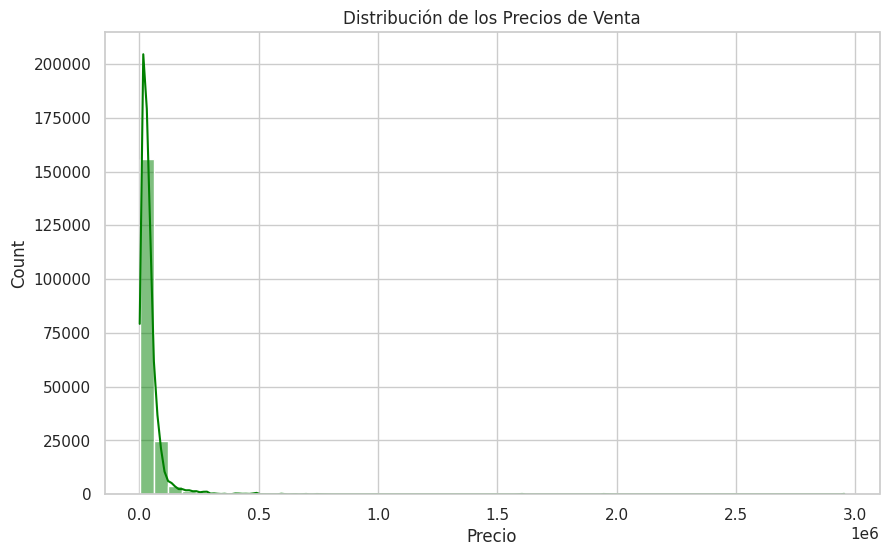

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df_final['price'], kde=True, bins=50, color='green')
plt.title('Distribución de los Precios de Venta')
plt.xlabel('Precio')
plt.show()

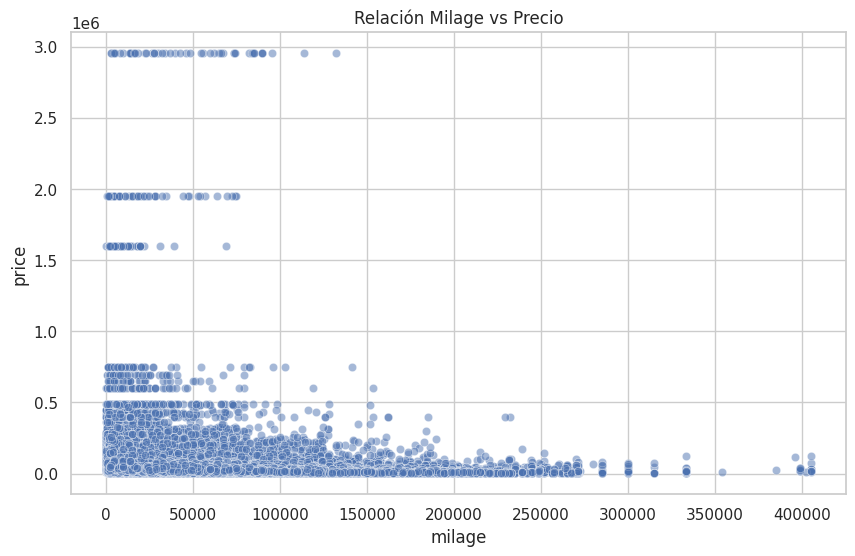

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='milage', y='price', alpha=0.5)
plt.title('Relación Milage vs Precio')
plt.show()

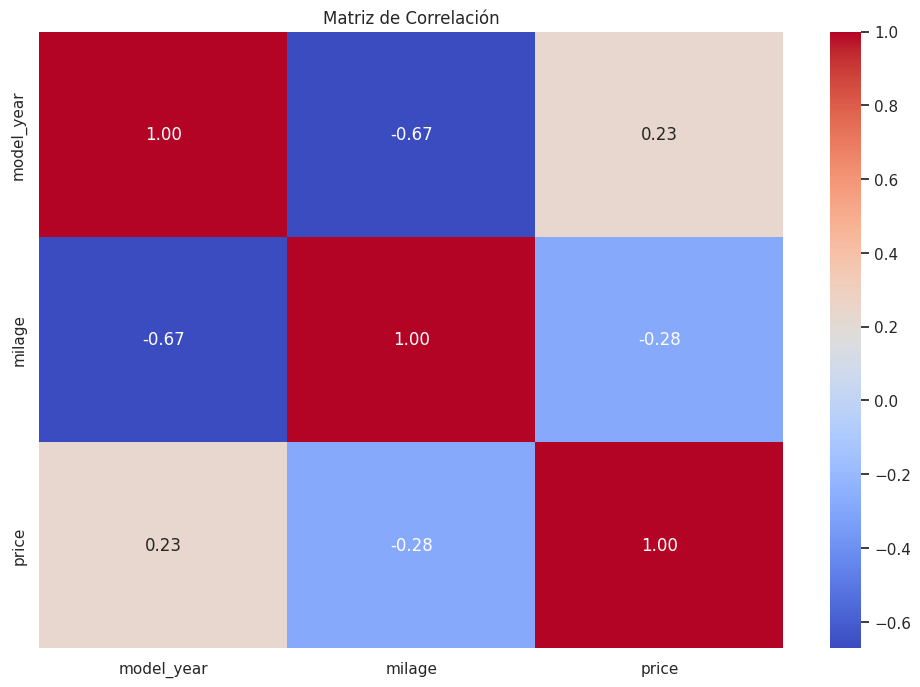

In [9]:
plt.figure(figsize=(12, 8))

numeric_cols = df_final.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [10]:
df_final.to_csv('train_ready_for_modeling.csv', index=False)
print("¡Archivo 'train_ready_for_modeling.csv' guardado con éxito!")

¡Archivo 'train_ready_for_modeling.csv' guardado con éxito!
